**Exploratory Data Analysis**

This notebook walks through some steps of exploratory data analysis, using data from the Borenstein Lab's curated gut microbiome/metabolome dataset collection. For more information about the dataset collection, see [this paper](https://www.nature.com/articles/s41522-022-00345-5). You can find the dataset itself [here](https://github.com/borenstein-lab/microbiome-metabolome-curated-data/tree/main).

In this notebook, we'll use two files from the Erawijantari 2020 dataset, which investigated the effect of gastrectomy on the microbiome (the original paper can be found [here](https://pubmed.ncbi.nlm.nih.gov/31953253/)).

The file metadata.tsv contains metadata for each sample, including the subject's age, gender, and study group (in this case, "healthy" and "gastrectomy"). The second file, genera.tsv, contains the relative abundances of different genera within a sample.

We'll go through the process of...

* Data cleaning
* Identifying potential confounders
* Exploring data distribution with histograms and box plots
* Visualizing differences in taxonomic composition using Bray-Curtis dissimilarity and Principal Coordinates Analysis (PCoA)
* Statistical testing with PERMANOVA

**Note:** This is a work in progress! If you find any errors or have any suggestions, drop me a line at jacquelinekgrimm@gmail.com.

**Loading Files**

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Load the metadata
metadata_path = '/content/drive/My Drive/erawijantari_gastric_cancer_2020/metadata.tsv'
metadata_df = pd.read_csv(metadata_path, sep='\t')

# Load the sequencing data
genera_path = '/content/drive/My Drive/erawijantari_gastric_cancer_2020/genera.tsv'
genera_df = pd.read_csv(genera_path, sep='\t')

In [3]:
# Display the metadata dataframe
metadata_df

,Dataset,Sample,Subject,Study.Group,Age,Age.Units,Gender,BMI,DOI,Publication.Name,...,Chronic hepatitis and liver cirrhosis,Gallstone,Ureteral or kidney stones,Gout...46,Hip fracture,Arm or wrist fracture,Femur base fractures,Other diseases,Subject.Num,Shared.w.YACHIDA_2019
0,ERAWIJANTARI_GASTRIC_CANCER_2020,10025.Healthy,10025.Healthy,Healthy,40,Years,Male,25.000000,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer tr...,...,No,No,No,No,No,No,No,No,10025,True
1,ERAWIJANTARI_GASTRIC_CANCER_2020,10036.Healthy,10036.Healthy,Healthy,64,Years,Female,21.155294,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer tr...,...,No,No,No,No,No,No,No,Yes,10036,True
2,ERAWIJANTARI_GASTRIC_CANCER_2020,10037.Healthy,10037.Healthy,Healthy,66,Years,Female,25.410900,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer tr...,...,No,No,No,No,No,No,No,No,10037,True
3,ERAWIJANTARI_GASTRIC_CANCER_2020,10048.Healthy,10048.Healthy,Healthy,77,Years,Female,23.634033,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer tr...,...,No,No,No,No,No,No,No,Yes,10048,True
4,ERAWIJANTARI_GASTRIC_CANCER_2020,10058.Healthy,10058.Healthy,Healthy,59,Years,Male,28.841532,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer tr...,...,No,No,No,No,No,No,No,No,10058,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,ERAWIJANTARI_GASTRIC_CANCER_2020,10791.Gastrectomy,10791.Gastrectomy,Gastrectomy,51,Years,Male,24.280975,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer tr...,...,No,No,No,No,No,No,No,No,10791,False
92,ERAWIJANTARI_GASTRIC_CANCER_2020,10794.Healthy,10794.Healthy,Healthy,54,Years,Female,22.189349,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer tr...,...,No,No,No,No,No,No,No,No,10794,True
93,ERAWIJANTARI_GASTRIC_CANCER_2020,10807.Healthy,10807.Healthy,Healthy,74,Years,Female,20.829995,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer tr...,...,No,Yes,Yes,No,No,No,No,No,10807,True
94,ERAWIJANTARI_GASTRIC_CANCER_2020,10810.Gastrectomy,10810.Gastrectomy,Gastrectomy,47,Years,Female,18.827111,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer tr...,...,No,No,No,No,No,No,No,No,10810,False


In [4]:
# Display the genera dataframe--check if its shape matches the metadata
genera_df

,Sample,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Oceaniglobus,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__Flemingibacterium,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__F0428,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes;c__Bacilli;o__Lactobacillales;f__Carnobacteriaceae;g__Carnobacterium_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__GCA-900066755,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhizobiales;f__Rhizobiaceae;g__Pararhizobium,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Enterobacterales;f__Enterobacteriaceae;g__PD-1,...,d__Bacteria;p__Fermentibacterota;c__Fermentibacteria;o__Fermentibacterales;f__Fermentibacteraceae;g__JAFGKQ01,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Qingshengfaniella,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Fuscovulum,d__Bacteria;p__Spirochaetota;c__Spirochaetia;o__Treponematales;f__Termitinemataceae;g__SZUA-426,d__Bacteria;p__Patescibacteria;c__Paceibacteria;o__Paceibacterales;f__UBA10102;g__VMEU01,d__Bacteria;p__Gemmatimonadota;c__Gemmatimonadetes;o__Longimicrobiales;f__UBA6960;g__SLCK01,d__Bacteria;p__Actinobacteriota;c__Thermoleophilia;o__Solirubrobacterales;f__Thermoleophilaceae;g__JACCZP01,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__DSM-16000;f__Inquilinaceae;g__JABDIP01,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Holosporales;f__Hepatobacteraceae;g__Hepatobacter,d__Bacteria;p__Actinobacteriota;c__Thermoleophilia;o__Solirubrobacterales;f__Thermoleophilaceae;g__Thermoleophilum
0,10776.Healthy,3.239561e-07,8.003622e-07,0.000007,0.000030,4.573498e-07,0.000011,2.286749e-06,1.009981e-06,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,10850.Healthy,0.000000e+00,7.197257e-07,0.000002,0.000014,1.640975e-06,0.000007,8.636709e-07,2.878903e-07,0.000004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,10543.Healthy,0.000000e+00,3.425342e-06,0.000008,0.000027,1.251567e-06,0.000157,6.126092e-06,3.392406e-06,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10246.Healthy,0.000000e+00,0.000000e+00,0.000003,0.000018,7.985710e-07,0.000014,1.443571e-06,1.074999e-06,0.000002,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,10156.Gastrectomy,3.901257e-07,2.089959e-06,0.000101,0.000080,1.226109e-06,0.000013,4.570044e-06,0.000000e+00,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,10782.Gastrectomy,2.834975e-07,1.833284e-06,0.000006,0.000037,6.425944e-07,0.000047,5.630261e-05,3.023974e-07,0.000007,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,10340.Healthy,0.000000e+00,1.821861e-06,0.000022,0.000091,8.097162e-07,0.000056,8.947364e-06,6.882587e-07,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,10189.Gastrectomy,0.000000e+00,1.277134e-05,0.000008,0.000048,1.391604e-06,0.000076,1.984158e-05,3.052551e-06,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,10226.Healthy,0.000000e+00,7.459747e-05,0.000007,0.000041,6.822939e-07,0.000061,1.924637e-05,5.970072e-07,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
# To check for nulls across both dataframes more easily, merge them together
initial_merge = pd.merge(metadata_df, genera_df, on='Sample', how='inner')
initial_merge

,Dataset,Sample,Subject,Study.Group,Age,Age.Units,Gender,BMI,DOI,Publication.Name,...,d__Bacteria;p__Fermentibacterota;c__Fermentibacteria;o__Fermentibacterales;f__Fermentibacteraceae;g__JAFGKQ01,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Qingshengfaniella,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Rhodobacterales;f__Rhodobacteraceae;g__Fuscovulum,d__Bacteria;p__Spirochaetota;c__Spirochaetia;o__Treponematales;f__Termitinemataceae;g__SZUA-426,d__Bacteria;p__Patescibacteria;c__Paceibacteria;o__Paceibacterales;f__UBA10102;g__VMEU01,d__Bacteria;p__Gemmatimonadota;c__Gemmatimonadetes;o__Longimicrobiales;f__UBA6960;g__SLCK01,d__Bacteria;p__Actinobacteriota;c__Thermoleophilia;o__Solirubrobacterales;f__Thermoleophilaceae;g__JACCZP01,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__DSM-16000;f__Inquilinaceae;g__JABDIP01,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__Holosporales;f__Hepatobacteraceae;g__Hepatobacter,d__Bacteria;p__Actinobacteriota;c__Thermoleophilia;o__Solirubrobacterales;f__Thermoleophilaceae;g__Thermoleophilum
0,ERAWIJANTARI_GASTRIC_CANCER_2020,10025.Healthy,10025.Healthy,Healthy,40,Years,Male,25.000000,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer tr...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,ERAWIJANTARI_GASTRIC_CANCER_2020,10036.Healthy,10036.Healthy,Healthy,64,Years,Female,21.155294,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer tr...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,ERAWIJANTARI_GASTRIC_CANCER_2020,10037.Healthy,10037.Healthy,Healthy,66,Years,Female,25.410900,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer tr...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,ERAWIJANTARI_GASTRIC_CANCER_2020,10048.Healthy,10048.Healthy,Healthy,77,Years,Female,23.634033,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer tr...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,ERAWIJANTARI_GASTRIC_CANCER_2020,10058.Healthy,10058.Healthy,Healthy,59,Years,Male,28.841532,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer tr...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,ERAWIJANTARI_GASTRIC_CANCER_2020,10791.Gastrectomy,10791.Gastrectomy,Gastrectomy,51,Years,Male,24.280975,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer tr...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
92,ERAWIJANTARI_GASTRIC_CANCER_2020,10794.Healthy,10794.Healthy,Healthy,54,Years,Female,22.189349,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer tr...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,ERAWIJANTARI_GASTRIC_CANCER_2020,10807.Healthy,10807.Healthy,Healthy,74,Years,Female,20.829995,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer tr...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
94,ERAWIJANTARI_GASTRIC_CANCER_2020,10810.Gastrectomy,10810.Gastrectomy,Gastrectomy,47,Years,Female,18.827111,10.1136/gutjnl-2019-319188,Influence of gastrectomy for gastric cancer tr...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
# Check for missing values
missing_values_summary = initial_merge.isnull().sum().sort_values(ascending=False)

# Display columns with missing values
missing_values_summary = missing_values_summary[missing_values_summary > 0]
missing_values_summary

Total_Cholesterol                        14
Glucose                                  12
Reconstruction                            2
Cataract                                  1
Stomach ulcer                             1
Uterine cancer                            1
Other cancers                             1
Stroke                                    1
Cardiac infarction                        1
Angina                                    1
Hypertension                              1
Diabetes                                  1
Dyslipidemia                              1
Stomach polyps                            1
Lung cancer                               1
Duodenal ulcers                           1
Colorectal polyps                         1
Chronic hepatitis and liver cirrhosis     1
Gallstone                                 1
Ureteral or kidney stones                 1
Gout...46                                 1
Hip fracture                              1
Arm or wrist fracture           

**Checking for Confounders**

First, we'll visualize the metadata, focusing on potentially confounding variables, age and BMI, and their distributions across study groups.

In [7]:
# Count # of samples for each gender and in each study group
gender_counts = metadata_df['Gender'].value_counts()
group_counts = metadata_df['Study.Group'].value_counts()

gender_counts, group_counts

(Male      64
 Female    32
 Name: Gender, dtype: int64,
 Healthy        54
 Gastrectomy    42
 Name: Study.Group, dtype: int64)

In [8]:
# Calculate summary statistics for age and BMI
age_bmi_summary = metadata_df[['Age', 'BMI']].agg(['mean', 'median'])
age_bmi_summary

,Age,BMI
mean,62.395833,22.243418
median,65.000000,22.055121


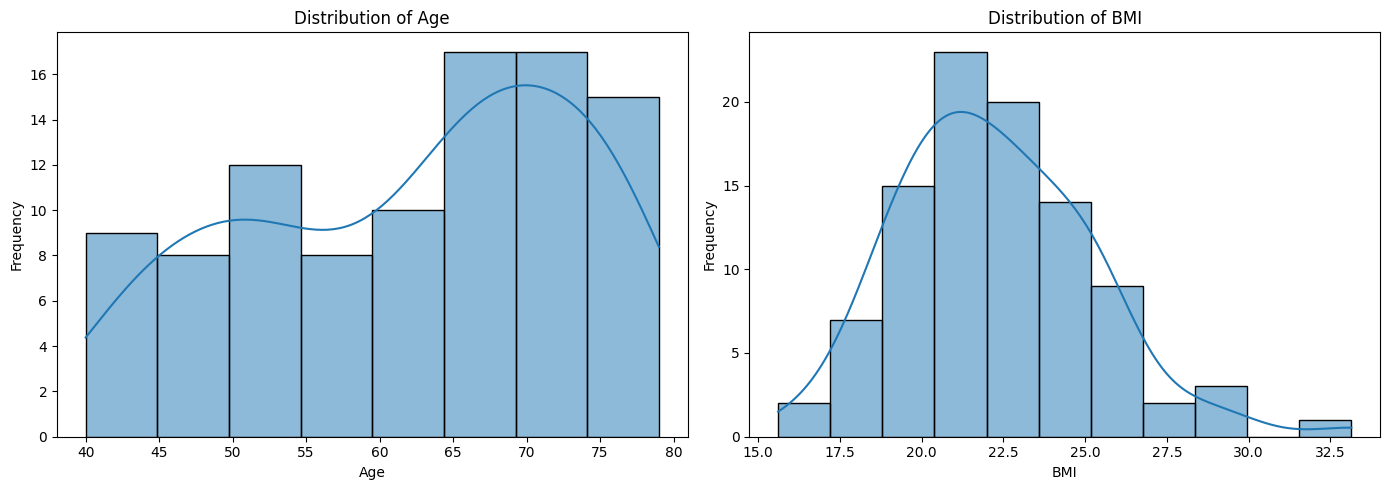

In [9]:
# Plot distributions of age and BMI across the entire dataset
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.histplot(metadata_df['Age'], kde=True, ax=axes[0])
axes[0].set_title('Distribution of Age')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

sns.histplot(metadata_df['BMI'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of BMI')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

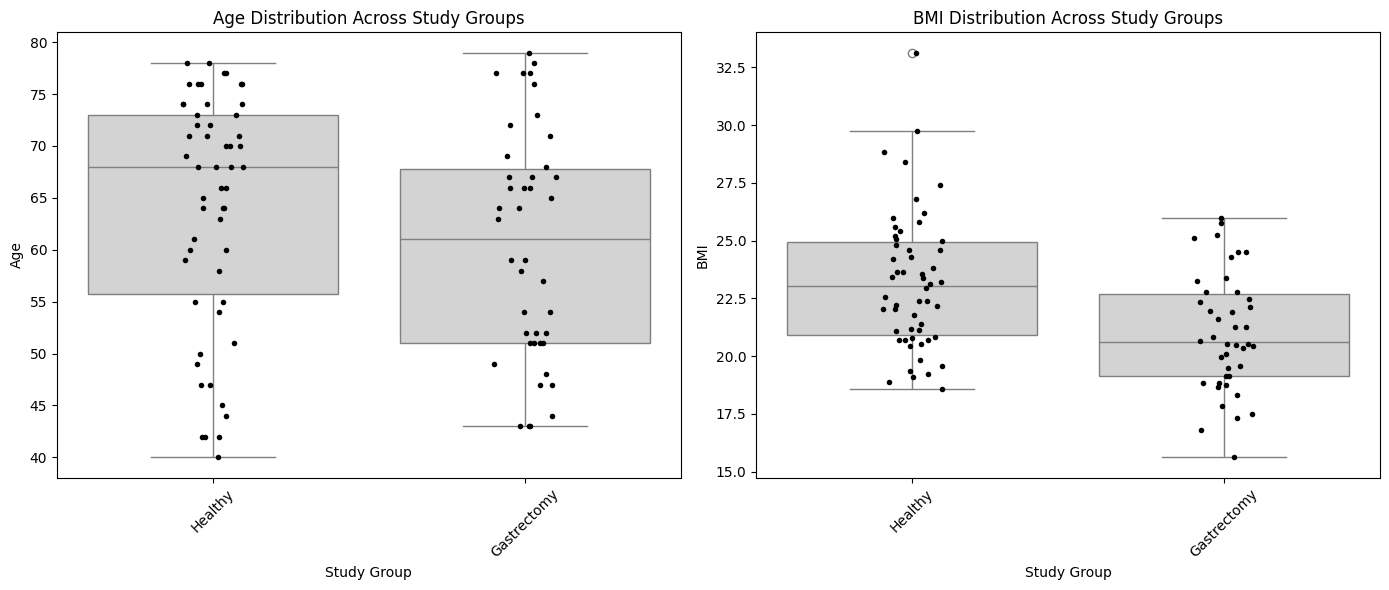

In [10]:
# Plot distribution of age and BMI across study groups
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

sns.boxplot(x='Study.Group', y='Age', data=metadata_df, color='lightgray', ax=axes[0])
sns.stripplot(x='Study.Group', y='Age', data=metadata_df, color='black', size=4, jitter=True, ax=axes[0])
axes[0].set_title('Age Distribution Across Study Groups')
axes[0].set_ylabel('Age')
axes[0].set_xlabel('Study Group')
axes[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Study.Group', y='BMI', data=metadata_df, color='lightgray', ax=axes[1])
sns.stripplot(x='Study.Group', y='BMI', data=metadata_df, color='black', size=4, jitter=True, ax=axes[1])
axes[1].set_title('BMI Distribution Across Study Groups')
axes[1].set_ylabel('BMI')
axes[1].set_xlabel('Study Group')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Visualize Sequencing Data**

Next, we'll dive into the sequencing data. Data from metagenomic sequencing is typically sparse (containing a lot of zeroes) and high-dimensional (a high number of genes per sample). This can cause problems in downstream analysis, for instance, it can result in overfitting during machine learning. So, an important part of data cleaning is often filtering to remove low-prevalence taxa, which reduces both dimensionality and sparseness.

However, there's a danger of introducing bias and/or losing biologically relevant information at this step, so it's important to strike a balance between reducing dimensionality and retaining relevant data. Remember to assess the impact of data cleaning on the structure of the dataset and on any downstream analytical steps.

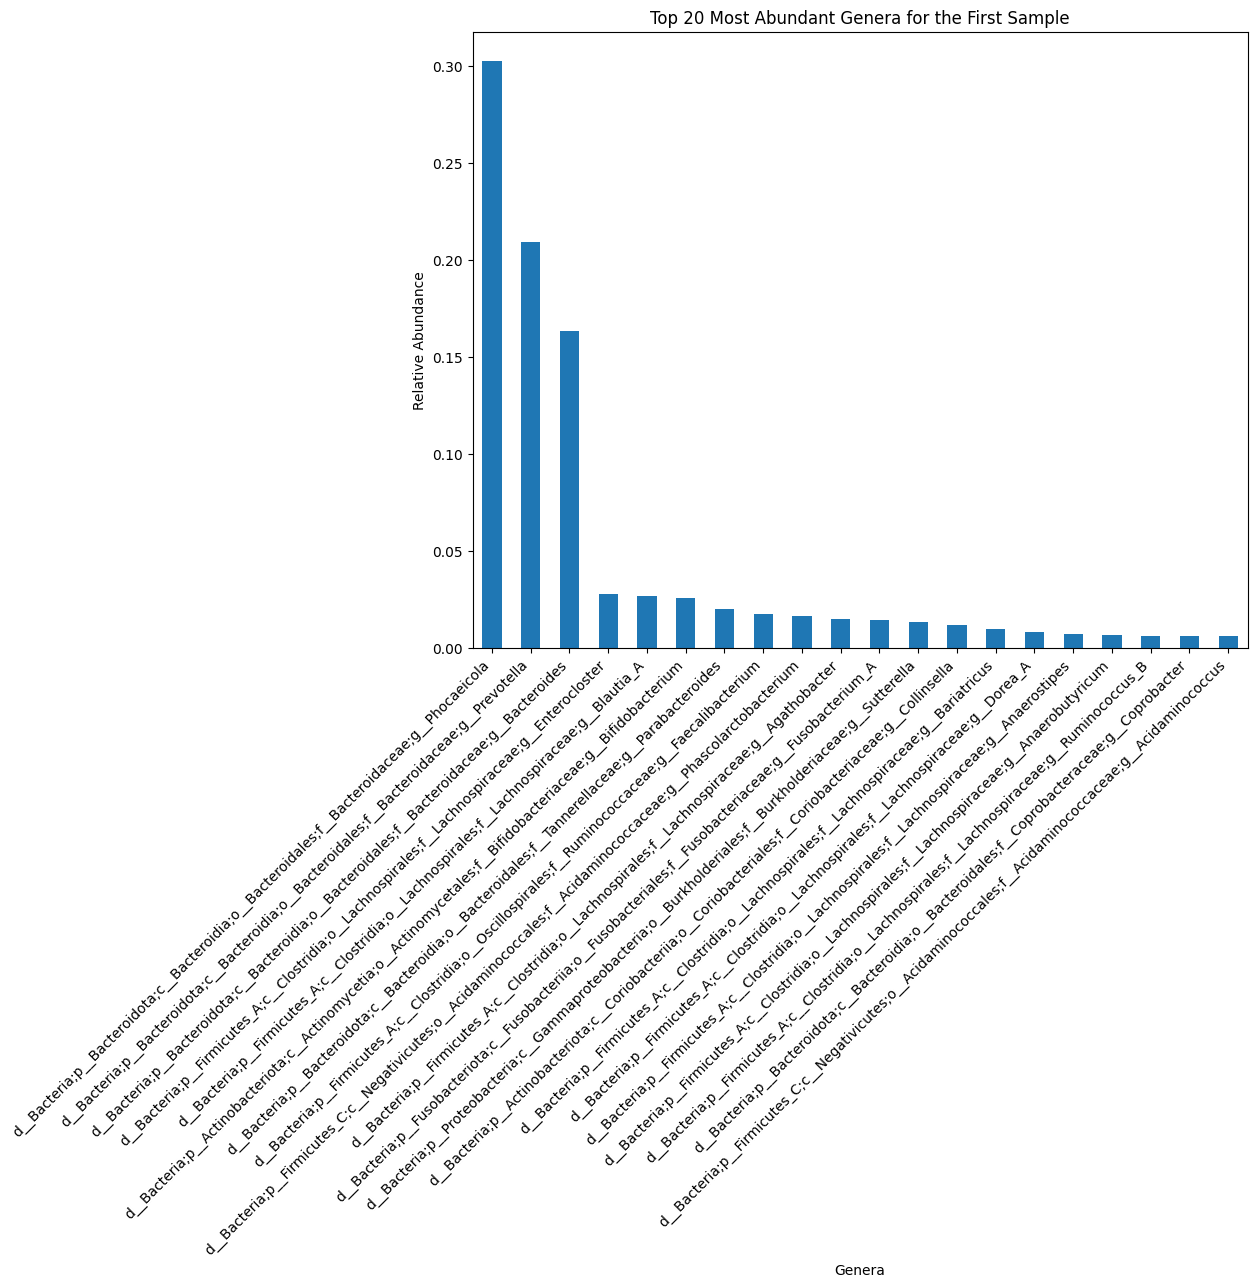

In [11]:
# Select the first sample's data (exclude the sample identifier column)
first_sample_data = genera_df.iloc[0, 1:]

# Since there are >10,000 columns, plot the top 20 most abundant genera to make it more manageable
top_genera = first_sample_data.sort_values(ascending=False).head(20)

plt.figure(figsize=(10, 8))
top_genera.plot(kind='bar', title='Top 20 Most Abundant Genera for the First Sample')
plt.xlabel('Genera')
plt.ylabel('Relative Abundance')
plt.xticks(rotation=45, ha="right")
plt.show()

You can see that only a few of the genera in this dataset are abundant in this sample. Let's check how many are present in abundances less than 0.1%.

In [12]:
# Count how many genera in the first sample have an abundance less than 0.1%
low_abundance_genera = (first_sample_data < 0.001).sum()

print(f'Low Abundance Genera: {low_abundance_genera}')

Low Abundance Genera: 10479


Let's take a look at the # of genera that exceed certain thresholds across the entire dataset.

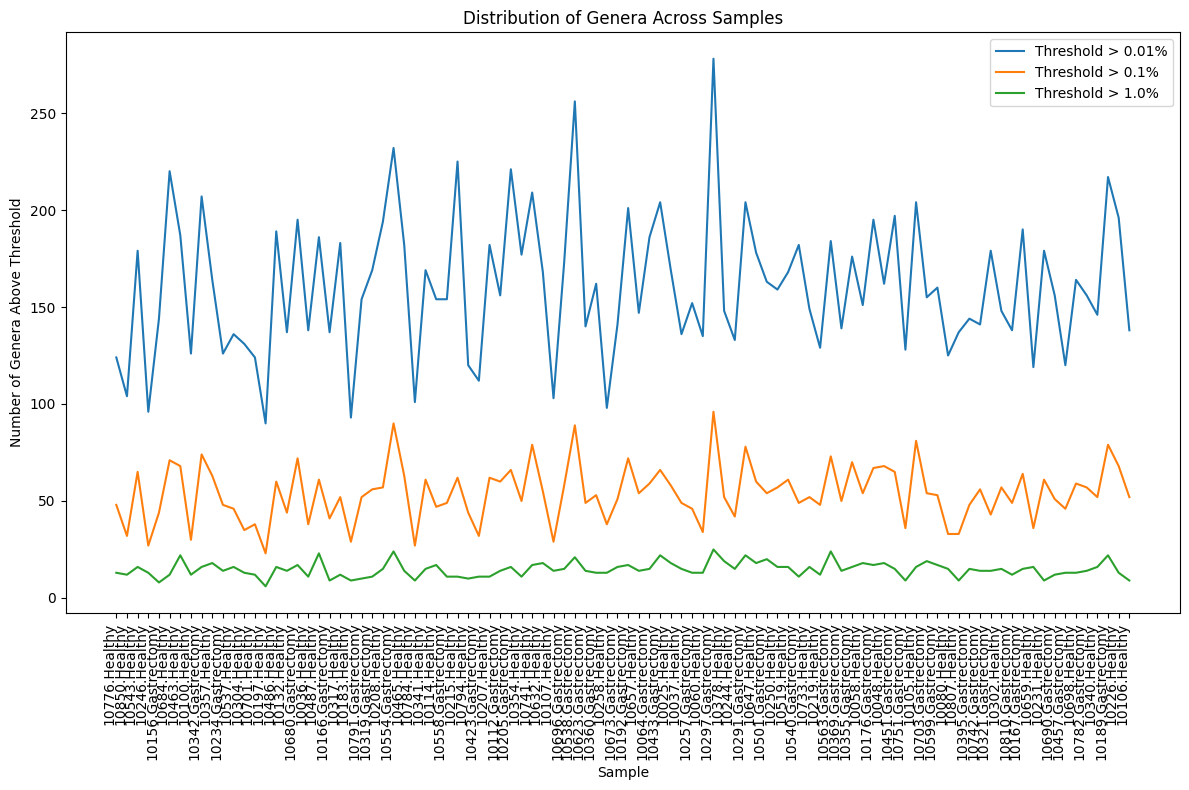

In [13]:
import numpy as np

# Calculate the # of genera exceeding certain thresholds for each sample
thresholds = [0.0001, 0.001, 0.01]  # 0.01%, 0.1%, and 1% thresholds
counts_above_threshold = {threshold: [] for threshold in thresholds}

for index, row in genera_df.iterrows():
    for threshold in thresholds:
        count = (row[1:] > threshold).sum()  # Exclude the sample identifier column
        counts_above_threshold[threshold].append(count)

# Plotting
plt.figure(figsize=(12, 8))
for threshold, counts in counts_above_threshold.items():
    plt.plot(genera_df['Sample'], counts, label=f'Threshold > {threshold*100}%')

plt.xlabel('Sample')
plt.ylabel('Number of Genera Above Threshold')
plt.title('Distribution of Genera Across Samples')
plt.xticks(rotation=90, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

For this notebook, we'll just take all the genera that are present in any sample at a relative abundance greater than 0.1%. Remember to adapt this step to your dataset and consider testing how different different thresholds affect downstream analysis.

In [14]:
# Identify genera present at a relative abundance greater than 0.1% in any sample
genera_above_threshold = (genera_df.drop('Sample', axis=1) > 0.001).any(axis=0)

# Filter the original dataframe to include only those genera
filtered_data = genera_df.loc[:, ['Sample'] + list(genera_above_threshold[genera_above_threshold].index)]
filtered_data

,Sample,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__CAG-448,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Burkholderiaceae;g__Sutterella,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__CAG-177,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Alcanivoracaceae;g__Alcanivorax,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__CAG-45,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Veillonellales;f__Veillonellaceae;g__Veillonella_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__Faecousia,...,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Burkholderiaceae;g__Saezia,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__RF32;f__CAG-239;g__Scatocola,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Christensenellales;f__CAG-74;g__Alectryocaccomicrobium,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__CAG-312;g__Merdousia,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__TANB77;f__CAG-508;g__WQVL01,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__UBA1390;g__NSJ-32,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__RF32;f__CAG-239;g__JAFTYO01,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Paludibacteraceae;g__Aphodosoma,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Burkholderiaceae;g__Mesosutterella,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Bifidobacteriaceae;g__Alloscardovia
0,10776.Healthy,0.000030,2.286749e-06,1.983755e-05,0.013064,0.000006,2.321050e-05,0.000024,7.641554e-06,0.000181,...,0.0,0.000000e+00,7.622497e-07,1.352993e-06,0.000000,4.268599e-06,3.239561e-07,3.563518e-06,8.765872e-07,2.286749e-07
1,10850.Healthy,0.000014,8.636709e-07,6.045696e-07,0.010217,0.000002,6.909367e-07,0.000023,3.742574e-06,0.000098,...,0.0,0.000000e+00,9.212489e-07,3.166793e-07,0.000000,0.000000e+00,0.000000e+00,8.492763e-06,0.000000e+00,0.000000e+00
2,10543.Healthy,0.000027,6.126092e-06,8.398675e-06,0.019109,0.000011,1.053951e-06,0.000051,3.293598e-07,0.000467,...,0.0,0.000000e+00,5.269757e-06,6.126092e-06,0.000000,1.350375e-06,0.000000e+00,2.832494e-06,6.587196e-07,2.437262e-06
3,10246.Healthy,0.000018,1.443571e-06,3.992855e-07,0.011678,0.000001,1.050428e-05,0.000021,1.382142e-06,0.000081,...,0.0,0.000000e+00,0.000000e+00,3.685712e-07,0.000000,9.214280e-07,0.000000e+00,1.719999e-06,0.000000e+00,3.378569e-07
4,10156.Gastrectomy,0.000080,4.570044e-06,2.201424e-06,0.001731,0.000688,1.693703e-04,0.000050,4.068454e-06,0.000234,...,0.0,0.000000e+00,0.000000e+00,1.086779e-06,0.000000,6.994396e-06,0.000000e+00,5.573224e-07,0.000000e+00,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,10782.Gastrectomy,0.000037,5.630261e-05,3.483240e-05,0.004191,0.007209,4.021885e-05,0.000080,1.901323e-05,0.001107,...,0.0,0.000000e+00,2.645977e-07,4.706059e-06,0.000000,2.173481e-06,1.039491e-06,1.455287e-06,3.212972e-07,7.748932e-07
92,10340.Healthy,0.000091,8.947364e-06,5.789471e-06,0.000018,0.000011,2.437651e-04,0.000056,1.295546e-06,0.000836,...,0.0,0.000000e+00,3.927123e-06,1.902833e-06,0.000000,2.455869e-04,0.000000e+00,1.214574e-05,9.311736e-07,1.214574e-06
93,10189.Gastrectomy,0.000048,1.984158e-05,2.358994e-05,0.004811,0.000038,2.648537e-06,0.000047,2.558756e-06,0.001990,...,0.0,9.022982e-05,3.389230e-06,6.666233e-06,0.000000,3.555324e-05,2.850544e-06,6.374445e-06,9.584113e-06,8.304735e-07
94,10226.Healthy,0.000041,1.924637e-05,7.135657e-05,0.005875,0.002180,2.223141e-04,0.000267,4.349624e-06,0.001344,...,0.0,4.832915e-07,4.179050e-06,3.286382e-05,0.001122,2.302742e-06,0.000000e+00,1.535161e-06,0.000000e+00,

**Visualize Differences in Community Composition**

Next, we'll explore how community structure varies across study groups by calculating Bray-Curtis dissimilarity. This is a metric of beta diversity, the variation in community structure or composition in different locations (in this case, different study groups.)

Then we'll visualize these differences using Principal Coordinate Analysis (PCoA), a statistical technique that represents complex, high-dimensional data in a lower-dimensional space. PCoA extracts the axes (the principal coordinates) that capture the maximum variability in the data.

For a critical take on the standard approach, see [this paper](https://www.frontiersin.org/journals/microbiology/articles/10.3389/fmicb.2017.02224/full).

In [15]:
!pip install -q scikit-bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 29.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.8 MB/s eta 0:00:00


In [16]:
# To visualize difference in terms of study groups, get the Study Group column from the metadata
merged_data = pd.merge(filtered_data, metadata_df[['Sample', 'Study.Group']], on='Sample')

# Ensure the Study Group column is categorical
merged_data['Study.Group'] = pd.Categorical(merged_data['Study.Group'])
merged_data

,Sample,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__Lachnoanaerobaculum,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Monoglobales;f__Monoglobaceae;g__Monoglobus,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__CAG-272;g__CAG-448,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Burkholderiaceae;g__Sutterella,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Acutalibacteraceae;g__CAG-177,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Pseudomonadales;f__Alcanivoracaceae;g__Alcanivorax,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__Lachnospiraceae;g__CAG-45,d__Bacteria;p__Firmicutes_C;c__Negativicutes;o__Veillonellales;f__Veillonellaceae;g__Veillonella_A,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Oscillospirales;f__Oscillospiraceae;g__Faecousia,...,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__RF32;f__CAG-239;g__Scatocola,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Christensenellales;f__CAG-74;g__Alectryocaccomicrobium,d__Bacteria;p__Verrucomicrobiota;c__Verrucomicrobiae;o__Opitutales;f__CAG-312;g__Merdousia,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__TANB77;f__CAG-508;g__WQVL01,d__Bacteria;p__Firmicutes_A;c__Clostridia;o__Lachnospirales;f__UBA1390;g__NSJ-32,d__Bacteria;p__Proteobacteria;c__Alphaproteobacteria;o__RF32;f__CAG-239;g__JAFTYO01,d__Bacteria;p__Bacteroidota;c__Bacteroidia;o__Bacteroidales;f__Paludibacteraceae;g__Aphodosoma,d__Bacteria;p__Proteobacteria;c__Gammaproteobacteria;o__Burkholderiales;f__Burkholderiaceae;g__Mesosutterella,d__Bacteria;p__Actinobacteriota;c__Actinomycetia;o__Actinomycetales;f__Bifidobacteriaceae;g__Alloscardovia,Study.Group
0,10776.Healthy,0.000030,2.286749e-06,1.983755e-05,0.013064,0.000006,2.321050e-05,0.000024,7.641554e-06,0.000181,...,0.000000e+00,7.622497e-07,1.352993e-06,0.000000,4.268599e-06,3.239561e-07,3.563518e-06,8.765872e-07,2.286749e-07,Healthy
1,10850.Healthy,0.000014,8.636709e-07,6.045696e-07,0.010217,0.000002,6.909367e-07,0.000023,3.742574e-06,0.000098,...,0.000000e+00,9.212489e-07,3.166793e-07,0.000000,0.000000e+00,0.000000e+00,8.492763e-06,0.000000e+00,0.000000e+00,Healthy
2,10543.Healthy,0.000027,6.126092e-06,8.398675e-06,0.019109,0.000011,1.053951e-06,0.000051,3.293598e-07,0.000467,...,0.000000e+00,5.269757e-06,6.126092e-06,0.000000,1.350375e-06,0.000000e+00,2.832494e-06,6.587196e-07,2.437262e-06,Healthy
3,10246.Healthy,0.000018,1.443571e-06,3.992855e-07,0.011678,0.000001,1.050428e-05,0.000021,1.382142e-06,0.000081,...,0.000000e+00,0.000000e+00,3.685712e-07,0.000000,9.214280e-07,0.000000e+00,1.719999e-06,0.000000e+00,3.378569e-07,Healthy
4,10156.Gastrectomy,0.000080,4.570044e-06,2.201424e-06,0.001731,0.000688,1.693703e-04,0.000050,4.068454e-06,0.000234,...,0.000000e+00,0.000000e+00,1.086779e-06,0.000000,6.994396e-06,0.000000e+00,5.573224e-07,0.000000e+00,0.000000e+00,Gastrectomy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,10782.Gastrectomy,0.000037,5.630261e-05,3.483240e-05,0.004191,0.007209,4.021885e-05,0.000080,1.901323e-05,0.001107,...,0.000000e+00,2.645977e-07,4.706059e-06,0.000000,2.173481e-06,1.039491e-06,1.455287e-06,3.212972e-07,7.748932e-07,Gastrectomy
92,10340.Healthy,0.000091,8.947364e-06,5.789471e-06,0.000018,0.000011,2.437651e-04,0.000056,1.295546e-06,0.000836,...,0.000000e+00,3.927123e-06,1.902833e-06,0.000000,2.455869e-04,0.000000e+00,1.214574e-05,9.311736e-07,1.214574e-06,Healthy
93,10189.Gastrectomy,0.000048,1.984158e-05,2.358994e-05,0.004811,0.000038,2.648537e-06,0.000047,2.558756e-06,0.001990,...,9.022982e-05,3.389230e-06,6.666233e-06,0.000000,3.555324e-05,2.850544e-06,6.374445e-06,9.584113e-06,8.304735e-07,Gastrectomy
94,10226.Healthy,0.000041,1.924637e-05,7.135657e-05,0.005875,0.002180,2.223141e-04,0.000267,4.349624e-06,0.001344,...,4.832915e-07,4.179050e-06,3.286382e-05,0.001122,2.302742e-06,0.000000e+00,1.535161e-06,0.000000e+00,1.734164e-06,Healthy


In [17]:
from skbio.diversity import beta_diversity
from skbio.stats.ordination import pcoa

# To prepare the data for the Bray-Curtis calculation, get only the abundance data
abundance_data = merged_data.drop(columns=['Sample', 'Study.Group']).values

# Get the sample identifiers
sample_ids = merged_data['Sample'].tolist()

# Calculate the Bray-Curtis dissimilarity matrix
bc_matrix = beta_diversity("braycurtis", abundance_data, sample_ids)

/usr/local/lib/python3.10/dist-packages/skbio/stats/ordination/_principal_coordinate_analysis.py:143: RuntimeWarning: The result contains negative eigenvalues. Please compare their magnitude with the magnitude of some of the largest positive eigenvalues. If the negative ones are smaller, it's probably safe to ignore them, but if they are large in magnitude, the results won't be useful. See the Notes section for more details. The smallest eigenvalue is -0.19740592189034392 and the largest is 6.5223624916810286.
  warn(


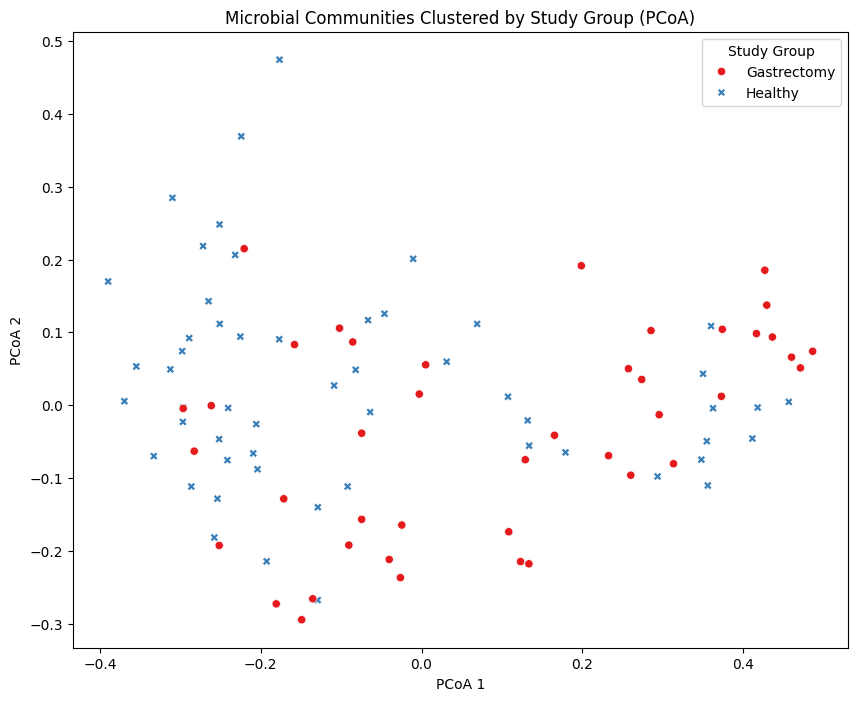

In [18]:
# Perform PCoA on the Bray-Curtis dissimilarity matrix
pcoa_results = pcoa(bc_matrix)

# Extract the first two principal coordinates for plotting
pc1_scores = pcoa_results.samples['PC1']
pc2_scores = pcoa_results.samples['PC2']

# Prepare a dataframe, again making sure that the Study Group column is properly categorized
plot_data = pd.DataFrame({
    'PC1': pc1_scores,
    'PC2': pc2_scores,
    'Study.Group': merged_data['Study.Group'].values
})

plot_data['Study.Group'] = pd.Categorical(plot_data['Study.Group'])

# Plotting
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PC1', y='PC2', hue='Study.Group', data=plot_data, palette='Set1', style='Study.Group')
plt.title('Microbial Communities Clustered by Study Group (PCoA)')
plt.xlabel('PCoA 1')
plt.ylabel('PCoA 2')
plt.legend(title='Study Group')
plt.show()

**Note about the warning:**

PCoA works by decomposing the difference matrix into eigenvalues, which represent the variance captured by each principal coordinate. So negative eigenvalues suggest a mathematical byproduct instead of a meaningful representation of the variance in the data. In this case, the smallest negative eigenvalue is relatively small compared with the largest positive eigenvalue, so it likely has a minimal impact on the results.

**Statistical Testing**

It doesn't look like there are obvious clusters in the PCoA plot, but remember that this is a visualization in a reduced dimensional space. When analyzing high-dimensional data like microbial communities, it's important to carry out statistical testing and not only rely on visual inspection.

Statistical testing will consider the composition across all dimensions and determine whether differences are greater than would be expected by chance. We'll use PERMANOVA, which can handle high dimensionality and does not rely on any assumptions about the data's distribution.

In [ ]:
from skbio.stats.distance import permanova

permanova_results = permanova(bc_matrix, merged_data['Study.Group'])
permanova_results

method name               PERMANOVA
test statistic name        pseudo-F
sample size                      96
number of groups                  2
test statistic             5.846703
p-value                       0.001
number of permutations          999
Name: PERMANOVA results, dtype: object

The p-value through PERMANOVA is 0.001, indicating that the composition of the microbial communities is significantly different between the Healthy and Gastrectomy groups.

Remember that there is no one approach to exploratory data analysis. The purpose is to better understand the data, discover anomalies or patterns, and guide a deeper dive into data analysis--this is just an example of a few commonly-used approaches.

**Finally, list installed packages and their versions for reproducibility. Happy exploring!**

In [ ]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.9.3
aiosignal                        1.3.1
alabaster                        0.7.16
albumentations                   1.3.1
altair                           4.2.2
annotated-types                  0.6.0
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.5.0
arviz                            0.15.1
astropy                          5.3.4
astunparse                       1.6.3
async-timeout                    4.0.3
atpublic                         4.0
attrs                            23.2.0
audioread                        3.0.1
autograd                         1.6.2
Babel                            2.14.0
backcall                         0.2.0
beautifulsoup4                   4.12.3
bi